In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import pandas as pd #para ler, visualizar e printar infos do df
import matplotlib.pyplot as plt #para construir e customizar gráficos
import seaborn as sns #para visualizar uns gráficos
import numpy as np #numpy porque é sempre bom importar numpy né 
import math
import datetime
import plotly.express as px

# Carregando conjunto de dados e tratamentos iniciais

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/OncoAI/Grupo 5 - OncoAI/Projeto/Base_de_dados/Merge_Trat.csv')
df.head()

,record_id,idade_no_primeiro_diagnostico,sexo,ultima_informacao,ja_ficou_gravida,ja_usou_drogas,realiza_atividades_fisicas,consumo_de_tabaco,consumo_de_alcool,possui_historico_familiar_de_cancer,...,grupo_estadio_clinico,classificacao_tnm_clinico_t,classificacao_tnm_clinico_n,classificacao_tnm_clinico_m,combinacao_dos_tratamentos_realizados_no_hospital,classificacao_tnm_patologico_n,classificacao_tnm_patologico_t,com_recidiva_a_distancia,com_recidiva_regional,com_recidiva_local
0,302,51.0,0,0.0,2,2,4,3,3,2,...,2.0,2,0,0,Cirurgia + Radio + Quimio + Hormonio,Nao informado,Nao informado,0,0,0
1,710,58.0,0,1.0,2,2,4,3,3,2,...,3.0,3,1,0,Cirurgia + Quimioterapia,Nao informado,Nao informado,0,1,1
2,752,56.0,0,1.0,2,2,4,3,3,2,...,2.0,2,0,0,Outras combinações,X - nao foi possivel determinar,2,0,0,0
3,1367,63.0,0,0.0,2,2,4,3,3,2,...,2.0,1,1,0,Outras combinações,1,1A,0,1,0
4,1589,42.0,0,1.0,2,2,4,3,3,2,...,2.0,2,1,0,Cirurgia + Radio + Quimio,Nao informado,Nao informado,0,0,0


In [4]:
df.shape

(3791, 47)

In [5]:
#porcentagem de nulos
null_demografico = df.isna()
pct_null_demografico = null_demografico.sum() / len(df)
pct_null_demografico

record_id                                                                 0.000000
idade_no_primeiro_diagnostico                                             0.000000
sexo                                                                      0.000000
ultima_informacao                                                         0.000528
ja_ficou_gravida                                                          0.000000
ja_usou_drogas                                                            0.000000
realiza_atividades_fisicas                                                0.000000
consumo_de_tabaco                                                         0.000000
consumo_de_alcool                                                         0.000000
possui_historico_familiar_de_cancer                                       0.000000
grau_de_parentesco(choice=primeiro(pais,_irmaos,_filhos))                 0.000000
grau_de_parentesco(choice=segundo(avós,_tios_e_netos))                    0.000000
grau

In [6]:
df.columns

Index(['record_id', 'idade_no_primeiro_diagnostico', 'sexo',
       'ultima_informacao', 'ja_ficou_gravida', 'ja_usou_drogas',
       'realiza_atividades_fisicas', 'consumo_de_tabaco', 'consumo_de_alcool',
       'possui_historico_familiar_de_cancer',
       'grau_de_parentesco(choice=primeiro(pais,_irmaos,_filhos))',
       'grau_de_parentesco(choice=segundo(avós,_tios_e_netos))',
       'grau_de_parentesco(choice=terceiro(bisavós,tio_avós,primos,sobrinhos))',
       'regime_tratamento', 'tipo_de_terapia_anti-her2_neoadjuvante',
       'data_entrada', 'peso_inicial', 'altura_cm', 'IMC', 'peso_max',
       'peso_min', 'diagnostico_primario_tipo_histologico', 'grau_histologico',
       'subtipo_tumoral', 'receptor_de_estrogenio', 'receptor_de_progesterona',
       'ki67_maior_14_percentage',
       'receptor_de_progesterona_quantificacao_percentage',
       'receptor_de_estrogenio_quantificacao_percentage',
       'indice_h_receptor_de_progesterona', 'her2_por_ihc', 'her2_por_fish',
   

# Criando um dataframe com as colunas que serãoo utilizadas nos testes

In [7]:
test = df[['grau_histologico','ki67_maior_14_percentage','subtipo_tumoral','receptor_de_progesterona','receptor_de_estrogenio','her2_por_ihc','her2_por_fish','grupo_estadio_clinico','classificacao_tnm_clinico_t','com_recidiva_regional','com_recidiva_a_distancia','com_recidiva_local','ultima_informacao','regime_tratamento','IMC']]

## Ajustando pesos pelas recidivas

In [8]:
pesos = []
for i in range(len(test.index)):
  if test.at[i,"com_recidiva_a_distancia"] == 1 or test.at[i,"com_recidiva_regional"] == 1 or test.at[i,"com_recidiva_local"]==1:
    pesos.append(-1)
  else:
    pesos.append(0)
test["peso_do_id"] = pesos
test.head()

<ipython-input-8-461893c184ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["peso_do_id"] = pesos


,grau_histologico,ki67_maior_14_percentage,subtipo_tumoral,receptor_de_progesterona,receptor_de_estrogenio,her2_por_ihc,her2_por_fish,grupo_estadio_clinico,classificacao_tnm_clinico_t,com_recidiva_regional,com_recidiva_a_distancia,com_recidiva_local,ultima_informacao,regime_tratamento,IMC,peso_do_id
0,2.0,3,5.0,1,1,3,4,2.0,2,0,0,0,0.0,NaN,23.120000,0
1,2.0,1,2.0,0,1,0,4,3.0,3,1,0,1,1.0,0.0,25.416667,-1
2,2.0,3,3.0,3,2,3,4,2.0,2,0,0,0,1.0,NaN,36.521739,0
3,2.0,1,2.0,1,1,0,4,2.0,1,1,0,0,0.0,NaN,28.950000,-1
4,2.0,3,5.0,1,1,3,4,2.0,2,0,0,0,1.0,NaN,22.571429,0


##Organizando a quantificação de estrogenio

In [9]:
test["receptor_de_estrogenio"].value_counts()

1    2375
0    1062
2     354
Name: receptor_de_estrogenio, dtype: int64

##Organizando a quantificação de progesterona

In [10]:
# test["ki67_percentage"].astype("float64")
# test["ki67_percentage"] = test["ki67_percentage"]/100
# test

##Organizando o regime de tratamento

In [11]:
test = test[test["regime_tratamento"].isnull()==False][test["regime_tratamento"]!=2][test["regime_tratamento"]!=3]

<ipython-input-11-69a400fc2b31>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = test[test["regime_tratamento"].isnull()==False][test["regime_tratamento"]!=2][test["regime_tratamento"]!=3]


In [12]:
test.shape

(2487, 16)

In [13]:
test["regime_tratamento"].value_counts()

0.0    1294
1.0    1193
Name: regime_tratamento, dtype: int64

## Organizando a classificação TNM-T

In [14]:
test = test[test["classificacao_tnm_clinico_t"]!="X - nao foi possivel determinar"][test["classificacao_tnm_clinico_t"]!="Y: Na"]

<ipython-input-14-2042a719347e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = test[test["classificacao_tnm_clinico_t"]!="X - nao foi possivel determinar"][test["classificacao_tnm_clinico_t"]!="Y: Na"]


In [15]:
test["classificacao_tnm_clinico_t"] = test["classificacao_tnm_clinico_t"].replace({"2":2,
                                                                                   "3":3,
                                                                                   "1C":1,
                                                                                   "4B":4,
                                                                                   "4D":4,
                                                                                   "1":1,
                                                                                   "4":4,
                                                                                   "1B":1,
                                                                                   "1A":1,
                                                                                   "4C":4,
                                                                                   "4A":4,
                                                                                   "IS":0,
                                                                                   "CDIS":0,
                                                                                   "3A":3})

## Filtrando vivos

In [16]:
for i in test.index:
  if test.at[i,"peso_do_id"]== 0 and test.at[i,"ultima_informacao"]== 0:
    test.at[i,"peso_do_id"] = -1
  elif test.at[i,"peso_do_id"]==0 and test.at[i,"ultima_informacao"]==2:
    test.at[i,"peso_do_id"] = -1

test = test[test["ultima_informacao"].isnull()==False]

for i in test.index:
  if test.at[i,"peso_do_id"]== 0:
    test.at[i,"peso_do_id"]= 1

##Organizando o grupo de estadiamento clínico

In [17]:
test = test[test["grupo_estadio_clinico"].isnull()==False]

In [18]:
for i in test.index:
  if test.at[i,"peso_do_id"] == -1:
    test.at[i,"peso_do_id"] = 0

##Banco de dados para os testes

In [19]:
test

,grau_histologico,ki67_maior_14_percentage,subtipo_tumoral,receptor_de_progesterona,receptor_de_estrogenio,her2_por_ihc,her2_por_fish,grupo_estadio_clinico,classificacao_tnm_clinico_t,com_recidiva_regional,com_recidiva_a_distancia,com_recidiva_local,ultima_informacao,regime_tratamento,IMC,peso_do_id
1,2.0,1,2.0,0,1,0,4,3.0,3,1,0,1,1.0,0.0,25.416667,0
5,2.0,1,4.0,0,0,0,4,2.0,1,1,0,0,0.0,0.0,24.230769,0
9,2.0,3,3.0,0,0,3,4,3.0,3,0,0,0,1.0,1.0,35.120000,1
15,2.0,3,3.0,3,2,3,2,1.0,1,0,0,0,1.0,0.0,24.090909,1
26,2.0,1,2.0,1,1,0,4,2.0,2,0,0,0,1.0,1.0,32.727273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,2.0,1,3.0,2,0,3,2,2.0,2,0,0,0,1.0,1.0,29.230769,1
3593,2.0,1,4.0,0,0,0,4,2.0,2,0,0,0,1.0,1.0,31.739130,1
3623,1.0,0,1.0,1,1,0,4,3.0,3,0,1,0,1.0,0.0,20.120000,0
3625,3.0,1,4.0,0,0,0,4,2.0,2,0,0,0,2.0,1.0,32.964286,0


In [20]:
#porcentagem de nulos
null_demografico = test.isna()
pct_null_demografico = null_demografico.sum() / len(test)
pct_null_demografico

grau_histologico               0.0
ki67_maior_14_percentage       0.0
subtipo_tumoral                0.0
receptor_de_progesterona       0.0
receptor_de_estrogenio         0.0
her2_por_ihc                   0.0
her2_por_fish                  0.0
grupo_estadio_clinico          0.0
classificacao_tnm_clinico_t    0.0
com_recidiva_regional          0.0
com_recidiva_a_distancia       0.0
com_recidiva_local             0.0
ultima_informacao              0.0
regime_tratamento              0.0
IMC                            0.0
peso_do_id                     0.0
dtype: float64

In [21]:
#removendo as métricas utilizadas para definir o sucesso, para comerçarmos os teste
test = test[test["peso_do_id"]==1]
test.drop(columns=["com_recidiva_regional","com_recidiva_a_distancia","com_recidiva_local","peso_do_id", "ultima_informacao"])

,grau_histologico,ki67_maior_14_percentage,subtipo_tumoral,receptor_de_progesterona,receptor_de_estrogenio,her2_por_ihc,her2_por_fish,grupo_estadio_clinico,classificacao_tnm_clinico_t,regime_tratamento,IMC
9,2.0,3,3.0,0,0,3,4,3.0,3,1.0,35.120000
15,2.0,3,3.0,3,2,3,2,1.0,1,0.0,24.090909
26,2.0,1,2.0,1,1,0,4,2.0,2,1.0,32.727273
28,2.0,3,3.0,3,2,3,4,2.0,2,0.0,30.384615
38,2.0,1,4.0,0,0,0,4,3.0,3,0.0,36.846154
...,...,...,...,...,...,...,...,...,...,...,...
3585,2.0,1,4.0,0,0,0,4,2.0,3,0.0,21.180000
3589,2.0,1,2.0,1,1,0,4,2.0,3,0.0,30.104167
3591,2.0,1,3.0,2,0,3,2,2.0,2,1.0,29.230769
3593,2.0,1,4.0,0,0,0,4,2.0,2,1.0,31.739130


##Ajustes para o treino

In [22]:
from sklearn.model_selection import train_test_split

X = test.drop(columns=["regime_tratamento"])
y = test["regime_tratamento"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 1234)


# Testes
Foram realizados diversos testes para observar e selecionar o modelo que tem a melhor e mais equilibrada acuracia de treino e teste, além de haver uma matriz de confusão com a diagonal principal com maiores valores.

In [23]:
# importando as ferramentas necessárias para os testes
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

## MLPClassifier

In [24]:
mlpc = MLPClassifier(random_state=1, max_iter=500)
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)
conf_matrixmlpc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',mlpc.score(X_train, y_train))
print('Acuracia de teste: ',mlpc.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7508223684210527
Acuracia de teste:  0.7471264367816092
F1 Score:  0.6615384615384615


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


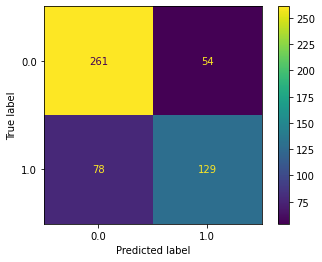

In [25]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixmlpc,
                              display_labels=mlpc.classes_)
disp.plot()
plt.show()

## KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
conf_matrixknn = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',knn.score(X_train, y_train))
print('Acuracia de teste: ',knn.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7195723684210527
Acuracia de teste:  0.7126436781609196
F1 Score:  0.601063829787234


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


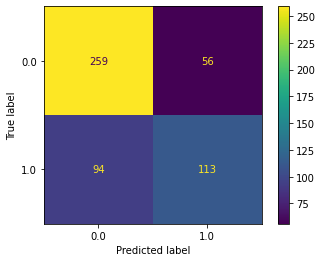

In [27]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixknn,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

## SVC

In [28]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
conf_matrixsvc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',svc.score(X_train, y_train))
print('Acuracia de teste: ',svc.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.772203947368421
Acuracia de teste:  0.7432950191570882
F1 Score:  0.6546391752577319


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


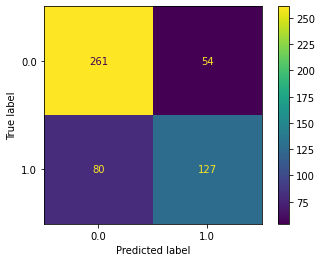

In [29]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixsvc,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

## Gaussian Process Classifier

In [30]:
gpc = GaussianProcessClassifier(kernel=1.0 * RBF(1.0),
                                random_state=0)
                                
gpc.fit(X_train, y_train)

y_pred = gpc.predict(X_test)
conf_matrixgpc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',gpc.score(X_train, y_train))
print('Acuracia de teste: ',gpc.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7384868421052632
Acuracia de teste:  0.7528735632183908
F1 Score:  0.6559999999999999


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


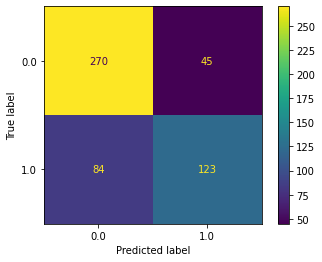

In [31]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixgpc,
                              display_labels=gpc.classes_)
disp.plot()
plt.show()

## RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
conf_matrixrfc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',rfc.score(X_train, y_train))
print('Acuracia de teste: ',rfc.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7327302631578947
Acuracia de teste:  0.7509578544061303
F1 Score:  0.6242774566473988


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


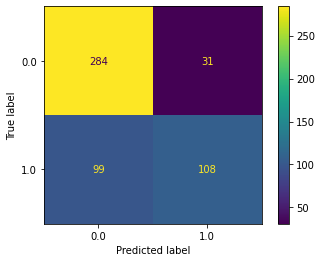

In [33]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixrfc,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

## AdaBoostClassifier

In [34]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)
conf_matrixabc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',abc.score(X_train, y_train))
print('Acuracia de teste: ',abc.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7713815789473685
Acuracia de teste:  0.7413793103448276
F1 Score:  0.6683046683046684


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


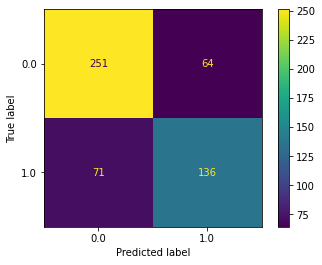

In [35]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixabc,
                              display_labels=abc.classes_)
disp.plot()
plt.show()

## GaussianNB

In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
conf_matrixnb = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',nb.score(X_train, y_train))
print('Acuracia de teste: ',nb.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7302631578947368
Acuracia de teste:  0.7049808429118773
F1 Score:  0.6280193236714976


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


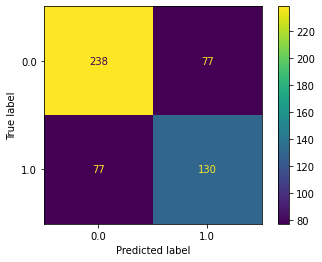

In [37]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixnb,
                              display_labels=nb.classes_)
disp.plot()
plt.show()

## Logistic Regression

In [38]:
logic = LogisticRegression(max_iter=400)
logic.fit(X_train , y_train)

y_pred = logic.predict(X_test)
conf_matrixlr = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',logic.score(X_train,y_train))
print('Acuracia de teste: ',logic.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7368421052631579
Acuracia de teste:  0.7567049808429118
F1 Score:  0.6649076517150396


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


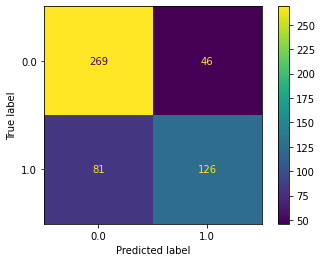

In [39]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixlr,
                              display_labels=logic.classes_)
disp.plot()
plt.show()

## Voting Classifier

In [40]:
estimators2 = [('svr',SVC(max_iter=3500)),("lr",LogisticRegression(max_iter=400)),("ada",AdaBoostClassifier()),("lin",LinearSVC(max_iter=5000))]

vc = VotingClassifier(estimators=estimators2)

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)
conf_matrixvc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',vc.score(X_train, y_train))
print('Acuracia de teste: ',vc.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acuracia de treino:  0.7450657894736842
Acuracia de teste:  0.7509578544061303
F1 Score:  0.6467391304347826


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


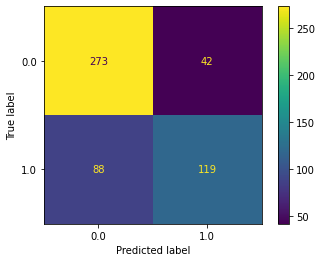

In [41]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixvc,
                              display_labels=vc.classes_)
disp.plot()
plt.show()

## Bagging Classifier

In [42]:
bc = BaggingClassifier(estimator=LogisticRegression(max_iter=400))

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)
conf_matrixbc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',bc.score(X_train, y_train))
print('Acuracia de teste: ',bc.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.734375
Acuracia de teste:  0.7490421455938697
F1 Score:  0.6561679790026247


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


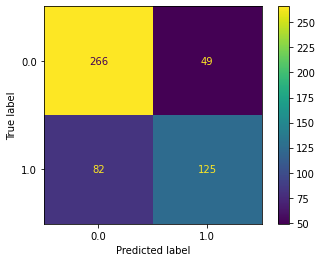

In [43]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixbc,
                              display_labels=bc.classes_)
disp.plot()
plt.show()

## LinearSVC

In [44]:
lin = LinearSVC(max_iter=4000)

lin.fit(X_train,y_train)

y_pred = lin.predict(X_test)
conf_matrixlin = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',lin.score(X_train, y_train))
print('Acuracia de teste: ',lin.score(X_test, y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7417763157894737
Acuracia de teste:  0.7509578544061303
F1 Score:  0.6933962264150945


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


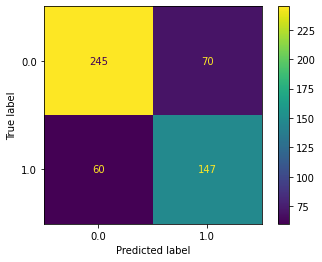

In [45]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixlin,
                              display_labels=lin.classes_)
disp.plot()
plt.show()

# Modelo escolhido

## Stacking Classifier
O modelo escolhido foi o Stacking Classifier, por apresentar melhor generalização, e possuir uma maior acuracidade no conjunto de teste, além de uma matriz de confusão com a diagonal principal com valores maiores.

In [46]:
estimators = [("rf",RandomForestClassifier(max_depth=4)),('svr',SVC(max_iter=2000)),("ada",AdaBoostClassifier())]

alg = StackingClassifier(estimators=estimators,final_estimator=LinearSVC(max_iter=4000))

alg.fit(X_train, y_train)

y_pred = alg.predict(X_test)
conf_matrixsc = confusion_matrix(y_test, y_pred)

print('Acuracia de treino: ',alg.score(X_train,y_train))
print('Acuracia de teste: ',alg.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test, y_pred))

Acuracia de treino:  0.7475328947368421
Acuracia de teste:  0.7586206896551724
F1 Score:  0.657608695652174


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


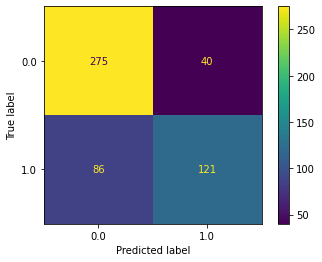

In [47]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixsc,
                              display_labels=alg.classes_)
disp.plot()
plt.show()